# IS CT3_Miniproject

### Name : Vinod 
### Course : MTech in Data Science

### DATA_SET:

The data (sample) were collected in São Paulo — Brazil, in a university area, where there are some parties with groups of students from 18 to 28 years of age (average). The dataset used for this activity has 7 attributes, being a Target, with period of one year.

* date
* average_temperature
*  minimum_temperature
* maximum_temperature
* precipitation
* weekend
* beer_consumption (target attribute)


In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# import 'Stats'
from scipy import stats
import statsmodels.api as sm

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import 'Sklearn libraries'
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset22/dataset (1).csv


### 1. Data Understanding (5 marks)

#### a. Read the dataset (tab, csv, xls, txt, inbuilt dataset). What are the number of rows and no. of cols & types of variables (continuous, categorical etc.)? (1 MARK)

In [2]:
# Reading the dataset
df = pd.read_csv('/kaggle/input/dataset22/dataset (1).csv')
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [3]:
# Check of Datatypes
df.dtypes

Data                            object
Temperatura Media (C)           object
Temperatura Minima (C)          object
Temperatura Maxima (C)          object
Precipitacao (mm)               object
Final de Semana                float64
Consumo de cerveja (litros)    float64
dtype: object

In [4]:
print('Number of Rows : \t', df.shape[0], '\nNumber of Columns : \t', df.shape[1])

Number of Rows : 	 941 
Number of Columns : 	 7


In [5]:
# Change in column values to float, datetime as they are in object type
df['Data'] = pd.to_datetime(df['Data'])
df["Temperatura Media (C)"]=df["Temperatura Media (C)"].str.replace(",",".").astype(float)
df["Temperatura Minima (C)"]=df["Temperatura Minima (C)"].str.replace(",",".").astype(float)
df["Temperatura Maxima (C)"]=df["Temperatura Maxima (C)"].str.replace(",",".").astype(float)
df['Precipitacao (mm)']=df['Precipitacao (mm)'].str.replace(",",".").astype(float)
pd.DataFrame({'Columns' : df.columns,'Datatypes' : df.dtypes.values})
df['Final de Semana']=df['Final de Semana'].replace([1.0, 0.0],[True,False])

In [6]:
types = []
for i, x in enumerate(df.dtypes):
    if x in ['bool', 'object']:
        types.append('Categorical')
    elif x in ['datetime64[ns]']:
        types.append('Numerical-Continous')
    else:
        types.append('Numerical-Discrete')
    

In [7]:
# Types of variable in columns
pd.DataFrame({'Columns' : df.columns,'Datatypes' : df.dtypes.values, 'Type' : types})

,Columns,Datatypes,Type
0,Data,datetime64[ns],Numerical-Continous
1,Temperatura Media (C),float64,Numerical-Discrete
2,Temperatura Minima (C),float64,Numerical-Discrete
3,Temperatura Maxima (C),float64,Numerical-Discrete
4,Precipitacao (mm),float64,Numerical-Discrete
5,Final de Semana,object,Categorical
6,Consumo de cerveja (litros),float64,Numerical-Discrete


#### b. Calculate five-point summary for numerical variables (1 MARK)

In [8]:
# five-point summary for numerical variables 
df_num = df.select_dtypes(exclude=['object', 'datetime64[ns]'])
pd.DataFrame({
    'Min':df_num.min(),
    '25%':df_num.quantile(.25),
    '50%':df_num.quantile(.50),
    '75%':df_num.quantile(.75),
    'Max':df_num.max()
})

,Min,25%,50%,75%,Max
Temperatura Media (C),12.900,19.020,21.380,23.280,28.860
Temperatura Minima (C),10.600,15.300,17.900,19.600,24.500
Temperatura Maxima (C),14.500,23.800,26.900,29.400,36.500
Precipitacao (mm),0.000,0.000,0.000,3.200,94.800
Consumo de cerveja (litros),14.343,22.008,24.867,28.631,37.937


#### c. Summarize observations for categorical variables – no. of categories, % observations in each category. (1 mark)



In [9]:
pd.DataFrame((df['Final de Semana'].value_counts()/len(df)*100))

,Final de Semana
False,27.736451
True,11.052072


#### d. Check for defects in the data such as missing values, null, outliers, etc. (2 marks)

In [10]:
# Null check
df.isnull().sum()

Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64

In [11]:
df.select_dtypes(exclude='object').columns

Index(['Data', 'Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)',
       'Consumo de cerveja (litros)'],
      dtype='object')

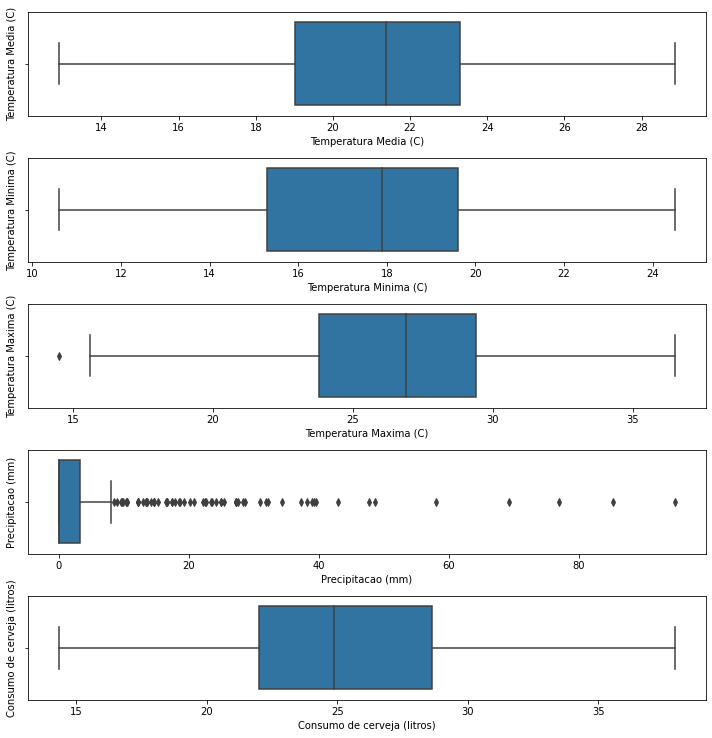

In [12]:
# Outlier Detection
plt.figure(figsize=(10,20))
for i,col in enumerate(df.select_dtypes(include = np.number)):
    plt.subplot(10,1,i+1)
    sns.boxplot(df[col])
    plt.ylabel(col)
plt.tight_layout()
plt.show()

### 2. Data Preparation (15 marks) 
 

#### a. Fix the defects found above and do appropriate treatment if any. (5 marks) 


In [13]:
# Null value treatment
df.dropna(axis=0, inplace=True)
df.isnull().sum()

Data                           0
Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
dtype: int64

<AxesSubplot:xlabel='Precipitacao (mm)'>

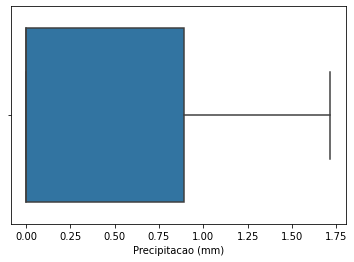

In [14]:
# Outlier treatment
# Found outliers for 'Precipitacao (mm)' and treating the columns alone with natural logarithm function of numpy
df['Precipitacao (mm)'] = np.log1p(df['Precipitacao (mm)'])
df['Precipitacao (mm)'] = np.log1p(df['Precipitacao (mm)'])
sns.boxplot(df['Precipitacao (mm)'])

#### b .Visualize the data using relevant plots. Find out the variables which are highly correlated with target variable? (5 marks)

In [15]:
# Converting Final de Semana to float type as object can't be used for pair plot
df['Final de Semana'] = df['Final de Semana'].astype(float)

In [16]:
df['Data'] = [df['Data'][i].timestamp() for i in range(len(df))]

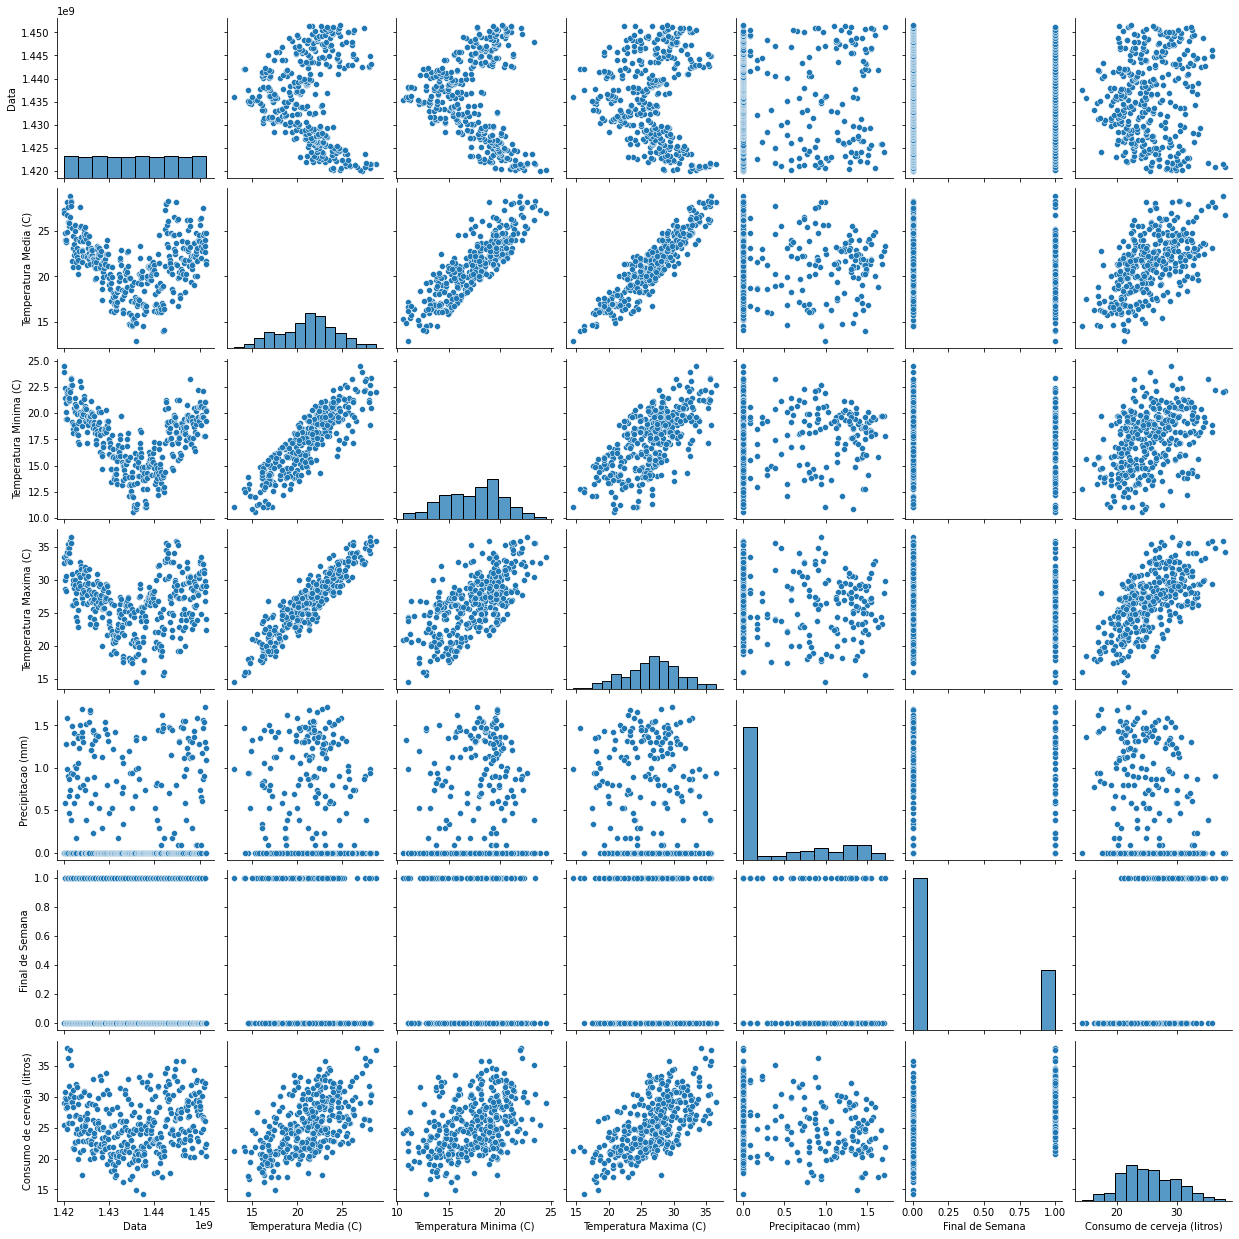

In [17]:
# Pair plot
sns.pairplot(df)

<AxesSubplot:>

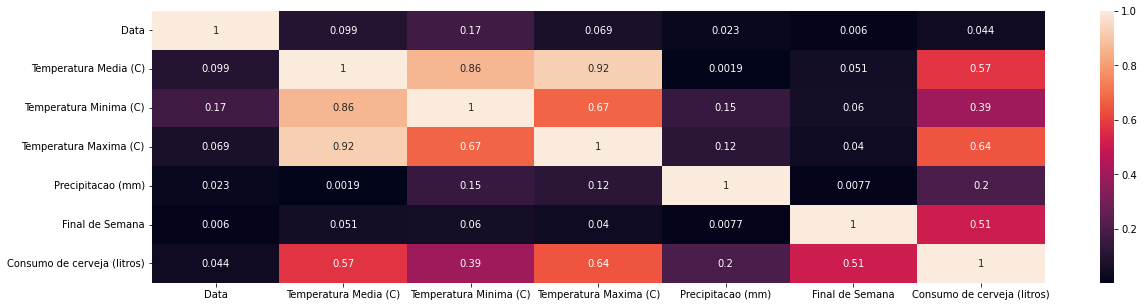

In [18]:
# Heap map plot with correlation
plt.figure(figsize=(20, 5))
sns.heatmap(abs(df.corr()), annot=True)

#### c. Do you want to exclude some variables from the model based on this analysis? What other actions will you take? (2 marks)

<AxesSubplot:>

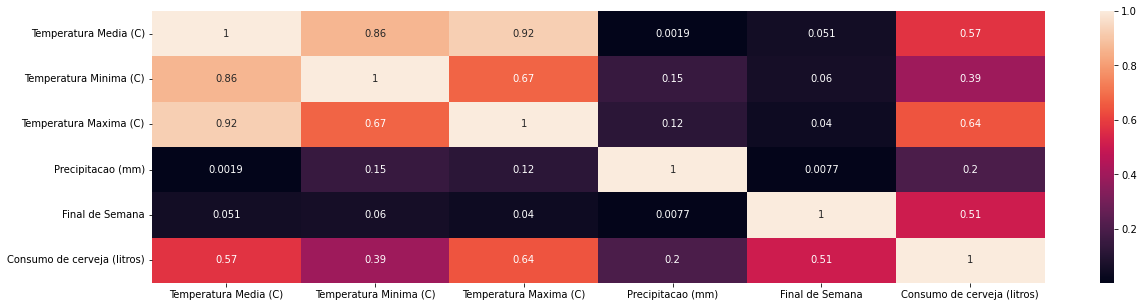

In [19]:
# As Precipitacao (mm) as low correlation, removing the column
df_req = df.drop(columns=['Data'])
plt.figure(figsize=(20, 5))
sns.heatmap(abs(df_req.corr()), annot=True)

#### d. Split dataset into train and test (70:30). Are both train and test representative of the overall data? How would you ascertain this statistically? (3 marks)

In [20]:
X = df_req.drop(columns=['Consumo de cerveja (litros)'])
y = df_req['Consumo de cerveja (litros)']
X_train , X_test , y_train, y_test = train_test_split(X,y,random_state=1, test_size=.30) 

In [21]:
X_train.describe()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana
count,255.000000,255.000000,255.000000,255.000000,255.000000
mean,21.225176,17.440392,26.590588,0.419733,0.309804
std,3.201380,2.874689,4.259837,0.587278,0.463322
min,14.000000,10.600000,15.600000,0.000000,0.000000
25%,18.920000,15.200000,23.900000,0.000000,0.000000
50%,21.280000,17.800000,26.700000,0.000000,0.000000
75%,23.460000,19.500000,29.400000,0.973668,1.000000
max,28.860000,24.500000,35.800000,1.716005,1.000000


In [22]:
X_test.describe()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana
count,110.000000,110.000000,110.000000,110.000000,110.000000
mean,21.229091,17.510000,26.660000,0.370591,0.227273
std,3.144761,2.722652,4.467337,0.518101,0.420988
min,12.900000,11.000000,14.500000,0.000000,0.000000
25%,19.480000,15.525000,23.600000,0.000000,0.000000
50%,21.550000,18.000000,27.050000,0.000000,0.000000
75%,23.075000,19.600000,29.375000,0.763993,0.000000
max,28.260000,23.400000,36.500000,1.678350,1.000000


In [23]:
y_train.describe()

count    255.00000
mean      25.56198
std        4.45789
min       14.34300
25%       22.03550
50%       24.87600
75%       28.93250
max       37.93700
Name: Consumo de cerveja (litros), dtype: float64

In [24]:
y_test.describe()

count    110.000000
mean      25.029036
std        4.256436
min       16.748000
25%       21.986250
50%       24.848500
75%       27.831500
max       34.496000
Name: Consumo de cerveja (litros), dtype: float64

##### Inference :  By comparing the above description we can infer that there is not much difference in the mean of the training and the testing inputs and outputs. Except for the minimum value.

### 3. Model Building ( 10 marks) 


#### a. Fit a base model and observe the overall R- Squared, RMSE and MAPE values of the model. Please comment on whether it is good or not. (7 marks)

In [25]:
# user-defined model function
def model_prediction(X,y):
    X_train , X_test , y_train, y_test = train_test_split(X,y,random_state=1, test_size=.30) 
    model = LinearRegression()
    model.fit(X_train,y_train)    
    y_predict = model.predict(X_test)
    print('\n\nCoef: \t\t', model.coef_)
    print('\nTrain Score: \t',model.score(X_train, y_train))
    print("R2 Score:  \t", r2_score(y_test, y_predict))
    print("RMSE:  \t\t", np.sqrt(mean_squared_error(y_test, y_predict)))
    print("MAPE:  \t\t", np.mean(np.abs((y_test- y_predict)/y_test))*100) 

In [26]:
# prediction values with current values of X and y
model_prediction(X,y)



Coef: 		 [ 0.12585028 -0.1234218   0.65703557 -1.05329013  5.03904134]

Train Score: 	 0.7124614362451925
R2 Score:  	 0.6880775332505011
RMSE:  		 2.366390249371322
MAPE:  		 7.912763852198103


In [27]:
# For better exposure checing the parameter of ols regression 
def ols_summary (X):
    X_constant = sm.add_constant(X)
    liner_reg = sm.OLS(y,X_constant).fit()
    print(liner_reg.summary())

In [28]:
ols_summary(X)

                                 OLS Regression Results                                
Dep. Variable:     Consumo de cerveja (litros)   R-squared:                       0.710
Model:                                     OLS   Adj. R-squared:                  0.706
Method:                          Least Squares   F-statistic:                     175.6
Date:                         Wed, 21 Dec 2022   Prob (F-statistic):           3.95e-94
Time:                                 12:04:04   Log-Likelihood:                -832.35
No. Observations:                          365   AIC:                             1677.
Df Residuals:                              359   BIC:                             1700.
Df Model:                                    5                                         
Covariance Type:                     nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

#### b. Check for multi-collinearity and treat the same. (3 marks)

In [29]:
# to check multicollinearity, creating a pre-defined function with Variance inflation Factor
def vif_manipulation(X_constant):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X_constant.columns
    vif_data["VIF"] = [variance_inflation_factor(X_constant.values, i)
                              for i in range(len(X_constant.columns))]
    return vif_data

In [30]:
vif_manipulation(X)

,feature,VIF
0,Temperatura Media (C),1087.103514
1,Temperatura Minima (C),253.828846
2,Temperatura Maxima (C),442.183340
3,Precipitacao (mm),1.686818
4,Final de Semana,1.374353


##### Inference : variance inflation factor(VIF) detects multicollinearity in regression model. Multicollinearity is when there’s correlation between predictors (i.e. independent variables) in a model; it’s presence can adversely affect the model. The VIF estimates how much the variance of a regression coefficient is inflated due to multicollinearity in the model. Generally VIF range starts from 1 and it keep rises If the VIF is close to 1 then there is no correlation. If VIF is greater than 2.5 to 5 then there is moderate correlation if it is greater then 5 then there is a high correlation.

<AxesSubplot:>

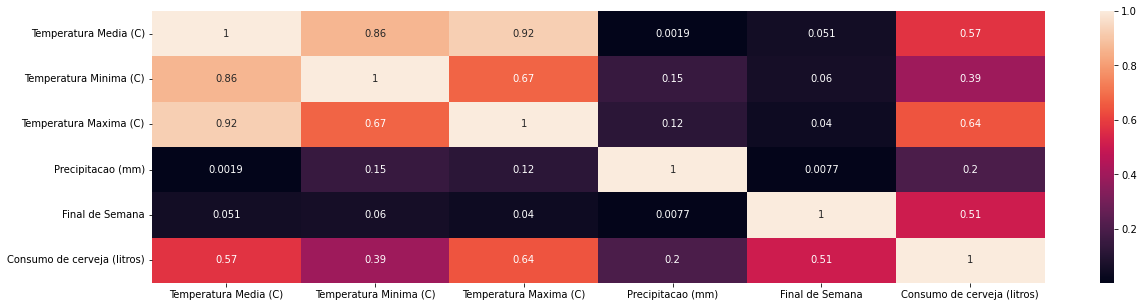

In [31]:
plt.figure(figsize=(20, 5))
sns.heatmap(abs(pd.concat([X,y], axis=1).corr()), annot=True)

##### On checking the VIF values with correlaion values of dependent variable with independent variables, I'm removing "Temperatura Minima (C)"


In [32]:
X1=X.drop("Temperatura Minima (C)",axis=1)

In [33]:
model_prediction(X1,y)



Coef: 		 [-0.05171804  0.72341177 -1.08365287  5.05634873]

Train Score: 	 0.7115759717296799
R2 Score:  	 0.6940316413500635
RMSE:  		 2.3436960992261753
MAPE:  		 7.84596335819407


In [34]:
ols_summary(X1)

                                 OLS Regression Results                                
Dep. Variable:     Consumo de cerveja (litros)   R-squared:                       0.710
Model:                                     OLS   Adj. R-squared:                  0.707
Method:                          Least Squares   F-statistic:                     220.1
Date:                         Wed, 21 Dec 2022   Prob (F-statistic):           2.51e-95
Time:                                 12:04:05   Log-Likelihood:                -832.35
No. Observations:                          365   AIC:                             1675.
Df Residuals:                              360   BIC:                             1694.
Df Model:                                    4                                         
Covariance Type:                     nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [35]:
vif_manipulation(X1)

,feature,VIF
0,Temperatura Media (C),297.940890
1,Temperatura Maxima (C),289.848394
2,Precipitacao (mm),1.650835
3,Final de Semana,1.374319


<AxesSubplot:>

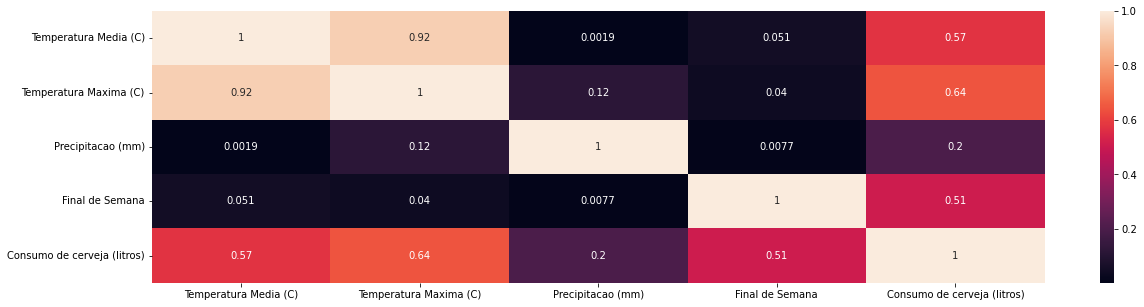

In [36]:
plt.figure(figsize=(20, 5))
sns.heatmap(abs(pd.concat([X1,y], axis=1).corr()), annot=True)

##### On checking the VIF values with correlaion values of dependent variable with independent variables, I'm removing "Temperatura Media (C)"


In [37]:
X2=X1.drop("Temperatura Media (C)",axis=1)

In [38]:
model_prediction(X2,y)



Coef: 		 [ 0.68723394 -1.11209724  5.05727061]

Train Score: 	 0.711386643879555
R2 Score:  	 0.6958810692863769
RMSE:  		 2.336602119141627
MAPE:  		 7.83621031226265


In [39]:
vif_manipulation(X2)

,feature,VIF
0,Temperatura Maxima (C),1.812040
1,Precipitacao (mm),1.454790
2,Final de Semana,1.374024


In [40]:
ols_summary(X2)

                                 OLS Regression Results                                
Dep. Variable:     Consumo de cerveja (litros)   R-squared:                       0.710
Model:                                     OLS   Adj. R-squared:                  0.707
Method:                          Least Squares   F-statistic:                     294.3
Date:                         Wed, 21 Dec 2022   Prob (F-statistic):           1.37e-96
Time:                                 12:04:06   Log-Likelihood:                -832.37
No. Observations:                          365   AIC:                             1673.
Df Residuals:                              361   BIC:                             1688.
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

#### **As per 3rd iteration with X2 independent variables, the R2 score is nearly 70%, So, this data is GOOD but not EXECELLENT in creating a prediction model for beer-consumption by an youngster between 18-28 years old**